In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import warnings
warnings.filterwarnings("ignore")

In [189]:
df=pd.read_csv("D:bank_marketing_part1_Data.csv")

In [190]:
df.duplicated().sum()

0

##  1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [191]:
df.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [192]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [193]:
df.shape

(210, 7)

In [194]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
spending,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
advance_payments,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
probability_of_full_payment,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
current_balance,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
credit_limit,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
min_payment_amt,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
max_spent_in_single_shopping,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [195]:
df.isnull().sum()

spending                        0
advance_payments                0
probability_of_full_payment     0
current_balance                 0
credit_limit                    0
min_payment_amt                 0
max_spent_in_single_shopping    0
dtype: int64

In [196]:
df.duplicated().sum()

0

Text(0.5, 1.0, 'current_balance')

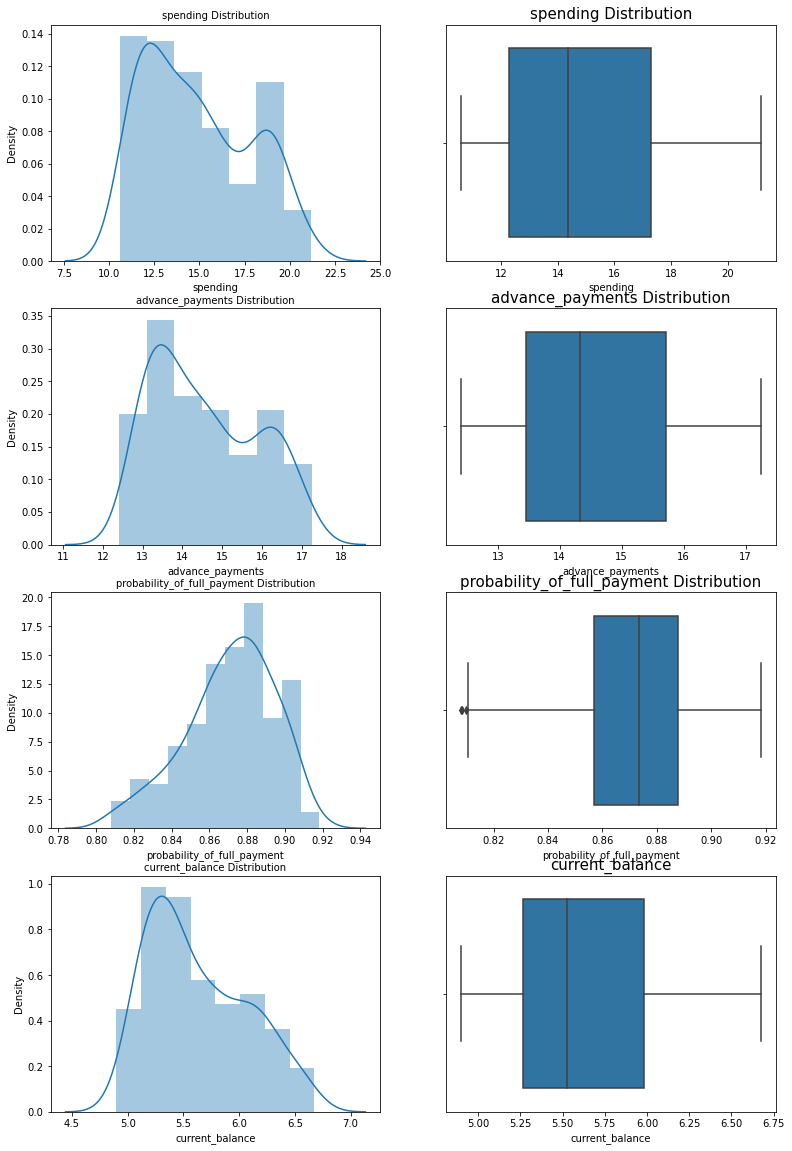

In [197]:
fig, axes = plt.subplots(nrows=4,ncols=2)
fig.set_size_inches(13, 20)

a = sns.distplot(df['spending'] , ax=axes[0][0])
a.set_title("spending Distribution",fontsize=10)
a = sns.boxplot(df['spending'] , orient = "v" , ax=axes[0][1])
a.set_title("spending Distribution",fontsize=15)

a = sns.distplot(df['advance_payments'] , ax=axes[1][0])
a.set_title("advance_payments Distribution",fontsize=10)
a = sns.boxplot(df['advance_payments'] , orient = "v" , ax=axes[1][1])
a.set_title("advance_payments Distribution",fontsize=15)

               
a = sns.distplot(df['probability_of_full_payment'] , ax=axes[2][0])
a.set_title("probability_of_full_payment Distribution",fontsize=10)
a = sns.boxplot(df['probability_of_full_payment'] , orient = "v" , ax=axes[2][1])
a.set_title("probability_of_full_payment Distribution",fontsize=15)

a = sns.distplot(df['current_balance'] , ax=axes[3][0])
a.set_title("current_balance Distribution",fontsize=10)
a = sns.boxplot(df['current_balance'] , orient = "v" , ax=axes[3][1])
a.set_title("current_balance",fontsize=15)


Text(0.5, 1.0, 'max_spent_in_single_shopping')

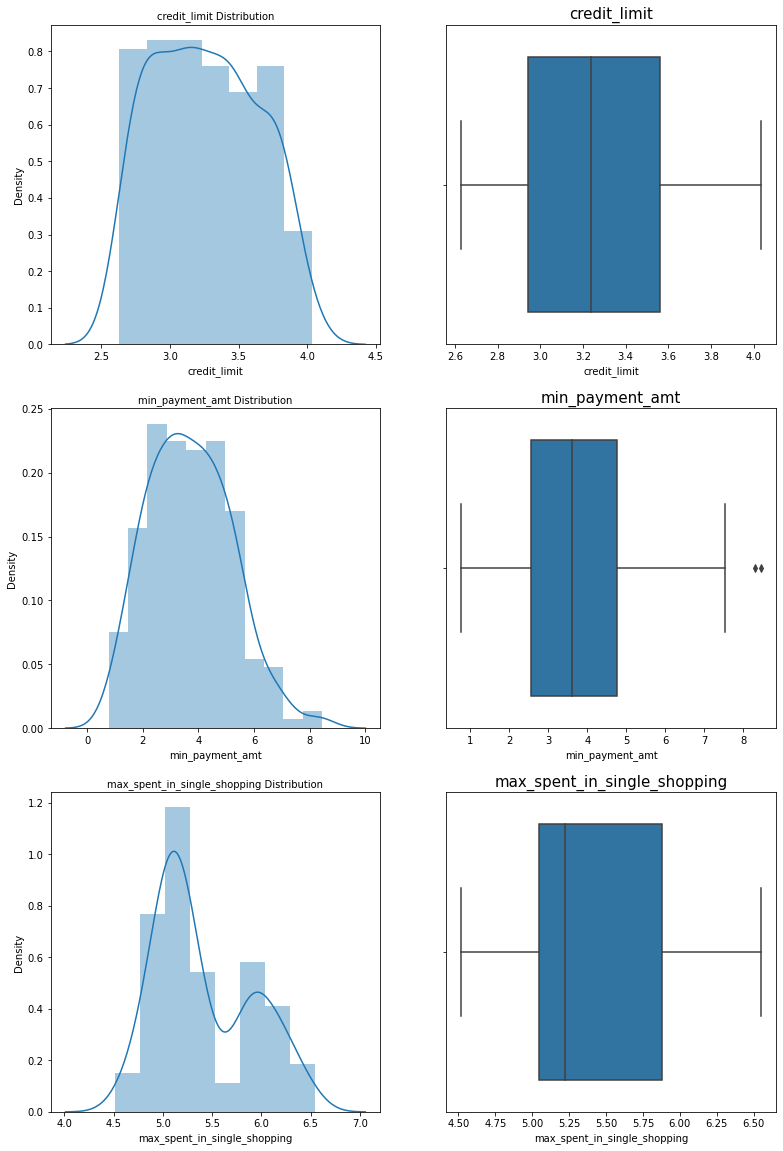

In [198]:
fig, axes = plt.subplots(nrows=3,ncols=2)
fig.set_size_inches(13, 20)

a = sns.distplot(df['credit_limit'] , ax=axes[0][0])
a.set_title("credit_limit Distribution",fontsize=10)
a = sns.boxplot(df['credit_limit'] , orient = "v" , ax=axes[0][1])
a.set_title("credit_limit",fontsize=15)

a = sns.distplot(df['min_payment_amt'] , ax=axes[1][0])
a.set_title("min_payment_amt Distribution",fontsize=10)
a = sns.boxplot(df['min_payment_amt'] , orient = "v" , ax=axes[1][1])
a.set_title("min_payment_amt",fontsize=15)

a = sns.distplot(df['max_spent_in_single_shopping'] , ax=axes[2][0])
a.set_title("max_spent_in_single_shopping Distribution",fontsize=10)
a = sns.boxplot(df['max_spent_in_single_shopping'] , orient = "v" , ax=axes[2][1])
a.set_title("max_spent_in_single_shopping",fontsize=15)

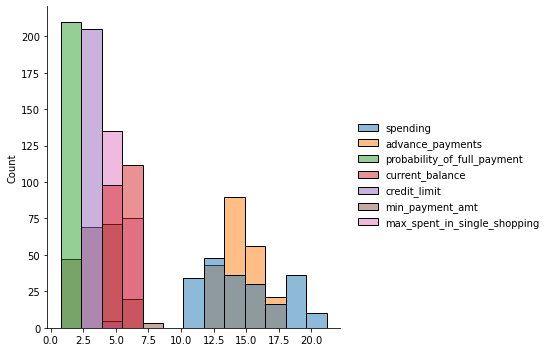

In [199]:
import seaborn as sns
sns.displot(data=df)

<Figure size 72x72 with 0 Axes>

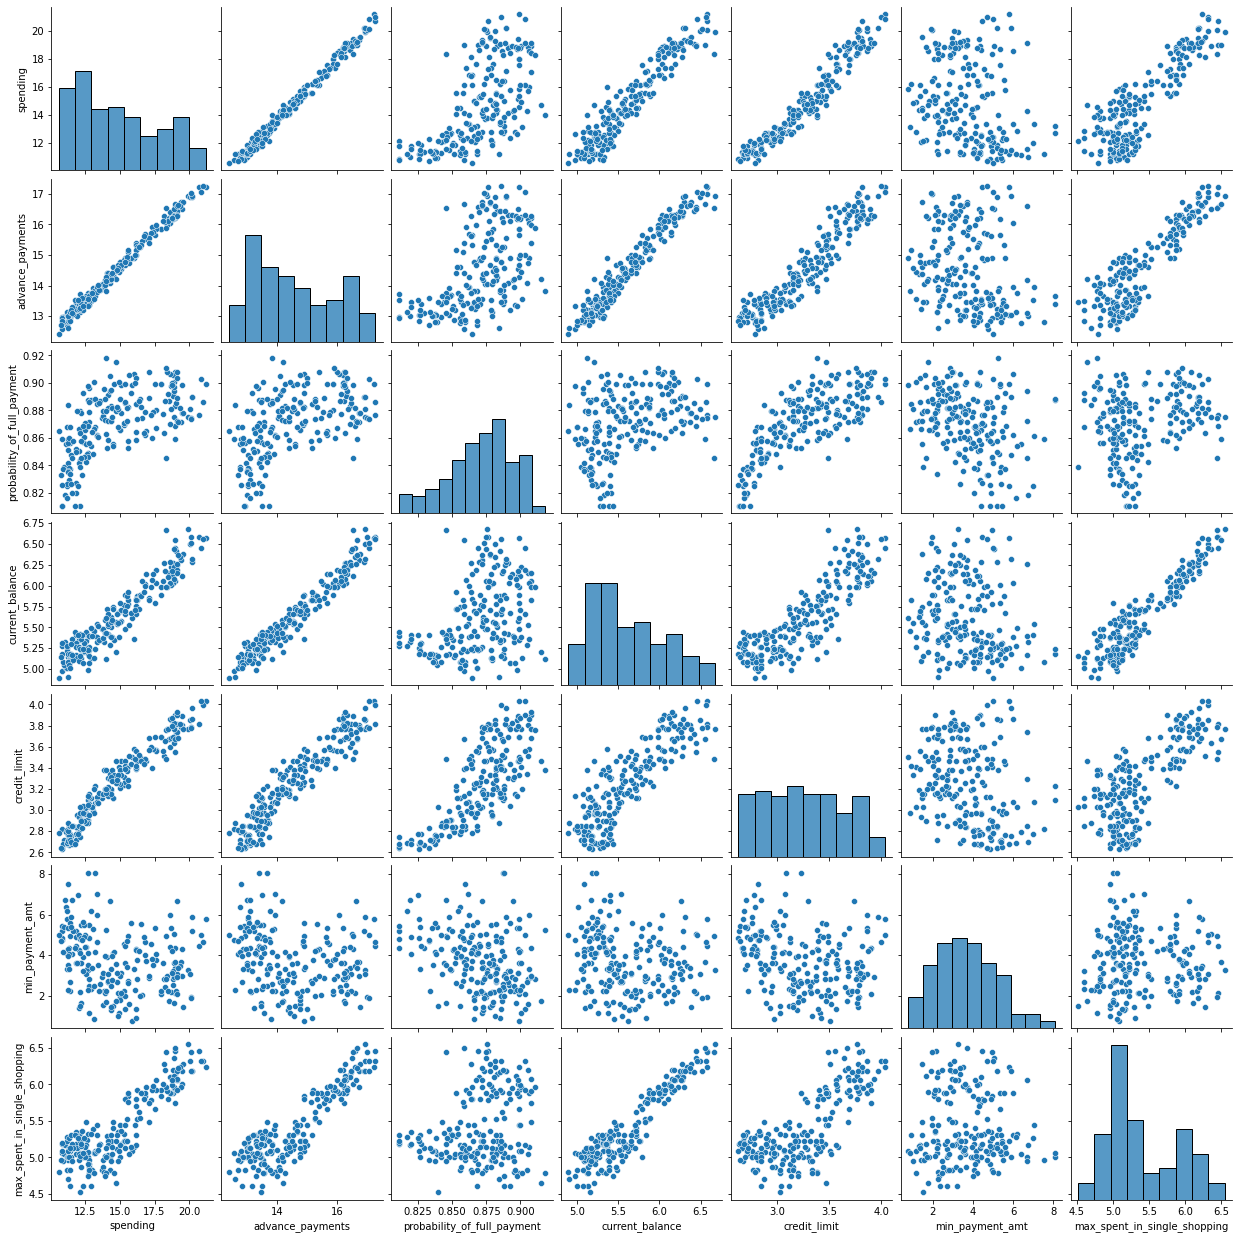

In [283]:
plt.figure(figsize=(1,1))
sns.pairplot(data=df)

array([[<AxesSubplot:title={'center':'spending'}>,
        <AxesSubplot:title={'center':'advance_payments'}>],
       [<AxesSubplot:title={'center':'probability_of_full_payment'}>,
        <AxesSubplot:title={'center':'current_balance'}>],
       [<AxesSubplot:title={'center':'credit_limit'}>,
        <AxesSubplot:title={'center':'min_payment_amt'}>],
       [<AxesSubplot:title={'center':'max_spent_in_single_shopping'}>,
        <AxesSubplot:>]], dtype=object)

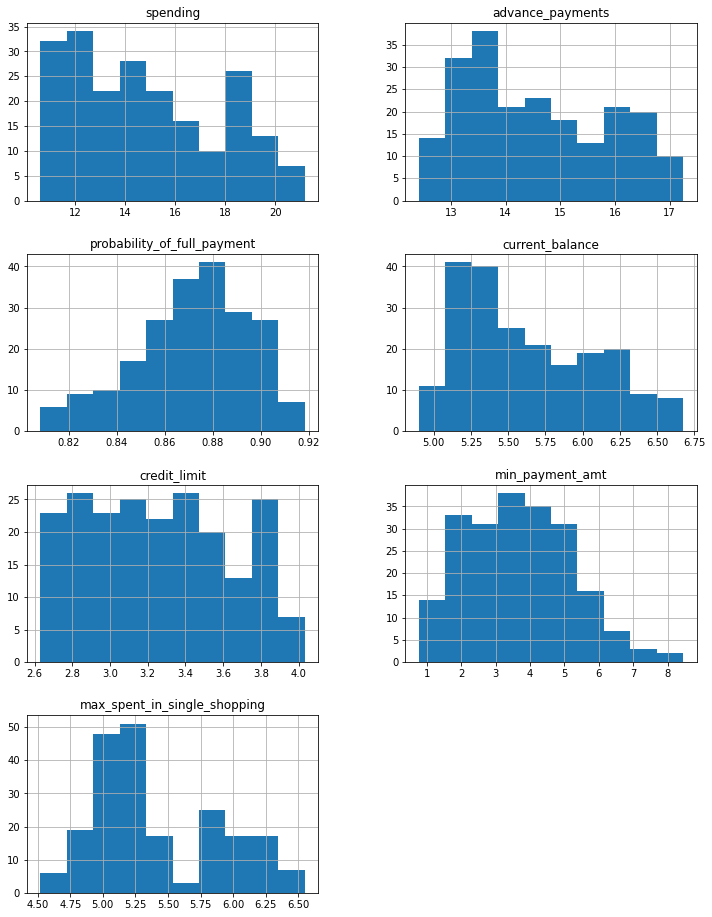

In [201]:
df.hist(figsize=(12,16),layout=(4,2))

In [202]:
df_corr=df.corr()
df_corr

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
spending,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693
advance_payments,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784
probability_of_full_payment,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825
current_balance,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806
credit_limit,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131
min_payment_amt,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079
max_spent_in_single_shopping,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000


<AxesSubplot:>

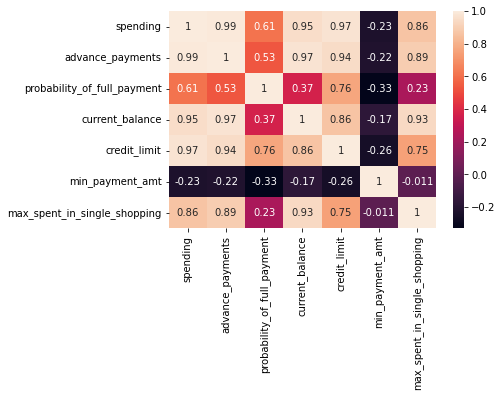

In [203]:
sns.heatmap(df_corr,annot=True)

checking outliers

<AxesSubplot:>

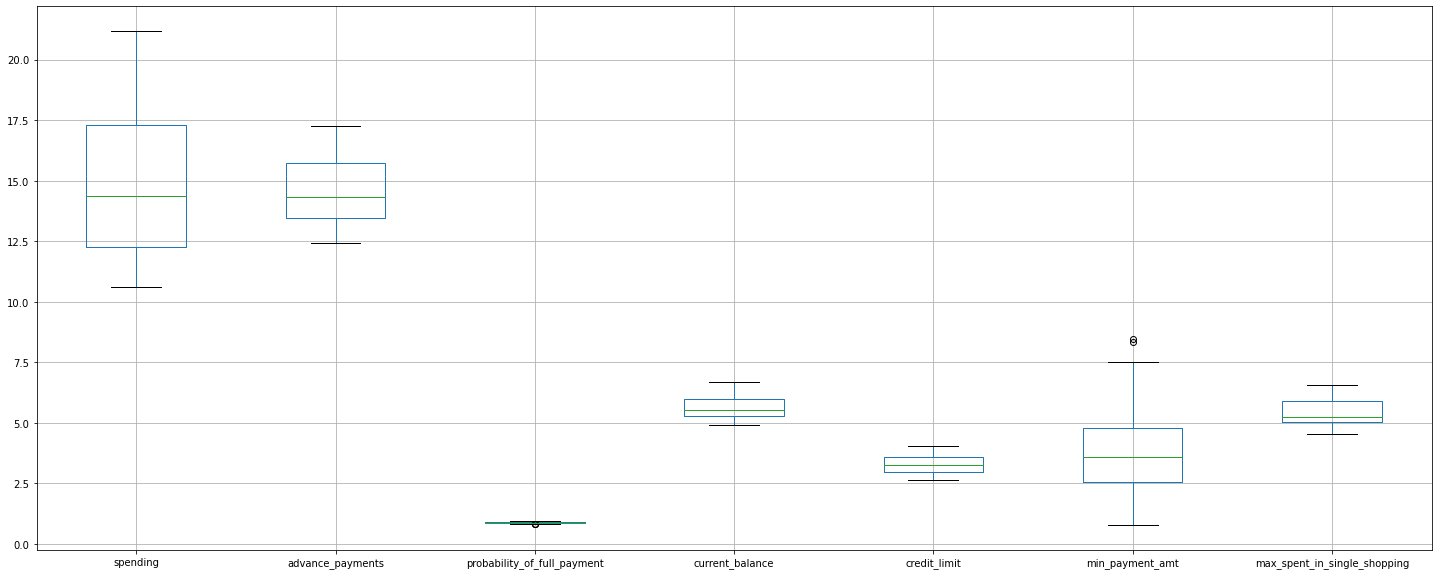

In [204]:
df.boxplot(figsize=(25,10))

treating outliers

In [205]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [206]:
lratio,uratio=remove_outlier(df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']>uratio,uratio,df['min_payment_amt'])
df['min_payment_amt']=np.where(df['min_payment_amt']<lratio,lratio,df['min_payment_amt'])

lratio,uratio=remove_outlier(df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']>uratio,uratio,df['probability_of_full_payment'])
df['probability_of_full_payment']=np.where(df['probability_of_full_payment']<lratio,lratio,df['probability_of_full_payment'])

<AxesSubplot:>

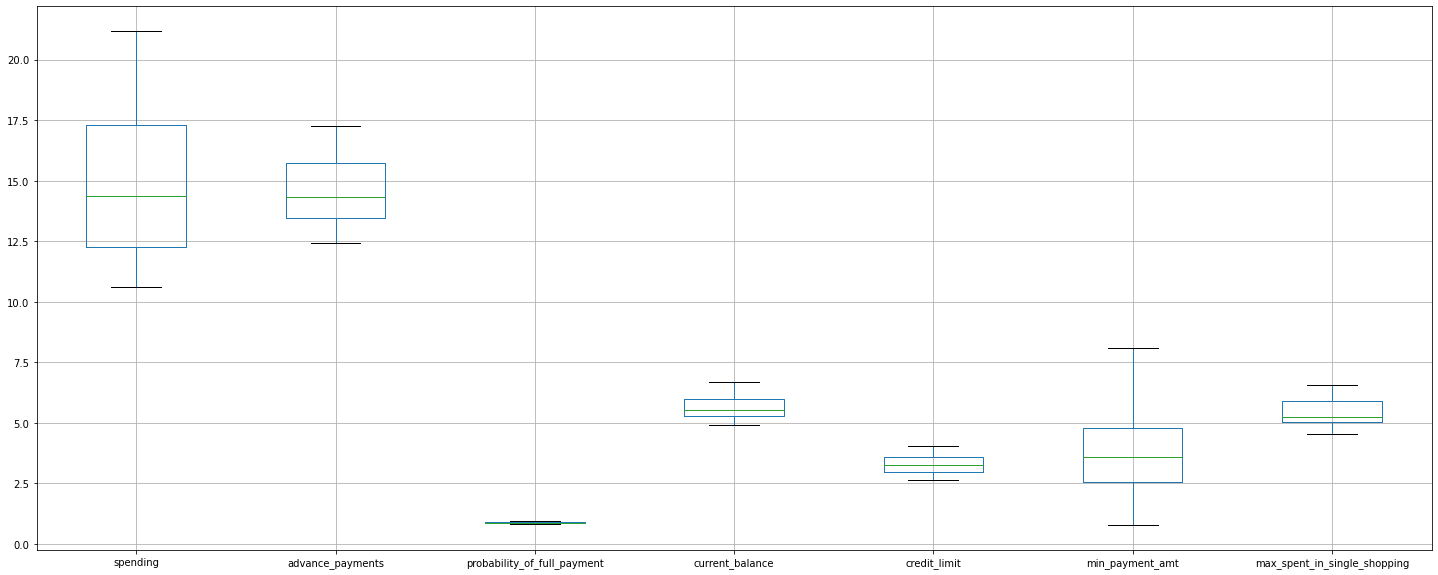

In [207]:
df.boxplot(figsize=(25,10))

<AxesSubplot:xlabel='probability_of_full_payment'>

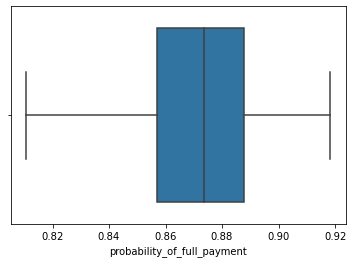

In [254]:
sns.boxplot(df['probability_of_full_payment'])

## 1.2  Do you think scaling is necessary for clustering in this case? Justify

Scaling needs to be done as the values of the variables are different.
spending, advance_payments are in different values and this may get more weightage.
Also have shown below the plot of the data prior and after scaling.
Scaling will have all the values in the relative same range.

In [208]:
from sklearn.preprocessing import StandardScaler 

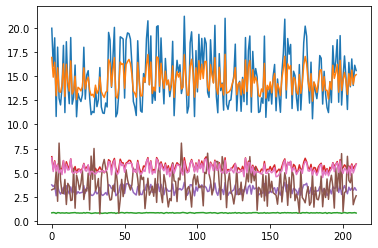

In [209]:
plt.plot(df)
plt.show()

In [210]:
from scipy.stats import zscore

In [257]:
df_scaled=df.copy()
df_scaled=df_scaled.apply(zscore)
df_scaled.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813


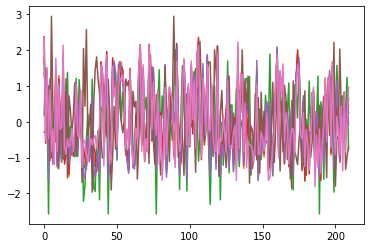

In [258]:
plt.plot(df_scaled)

## 1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [259]:
from scipy.cluster.hierarchy import dendrogram, linkage

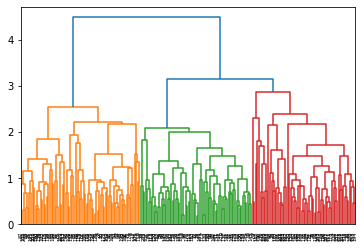

In [261]:
link_method = linkage(df_scaled, method = 'average')
dend = dendrogram(link_method)

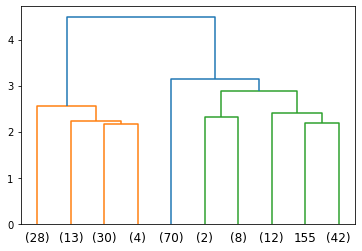

In [262]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

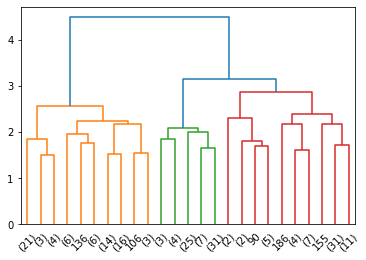

In [263]:
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 25)

In [264]:
from scipy.cluster.hierarchy import fcluster

In [265]:
clusters = fcluster(link_method, 3, criterion='maxclust')
clusters

array([1, 3, 1, 2, 1, 3, 2, 2, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1,
       1, 3, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 3, 1, 3, 1, 3, 1, 1, 2, 3, 1,
       1, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 2, 3, 2, 3, 1,
       3, 3, 2, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 2, 3, 2, 3, 1, 1, 1,
       3, 2, 3, 2, 3, 2, 3, 3, 1, 1, 3, 1, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 3, 3, 2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [266]:
cluster_dataset=df.copy()
cluster_dataset['clusters-3'] = clusters
cluster_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [267]:
cluster_dataset['clusters-3'].value_counts().sort_index()

1    75
2    70
3    65
Name: clusters-3, dtype: int64

In [268]:
wardlink = linkage(df_scaled, method = 'ward')

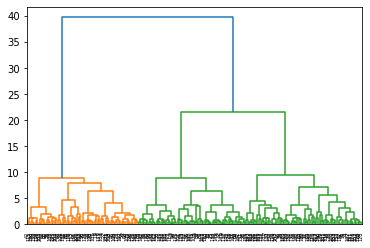

In [269]:
dend_wardlink = dendrogram(wardlink)

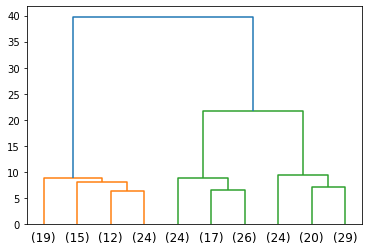

In [270]:
dend_wardlink = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [271]:
clusters_wdlk_3 = fcluster(wardlink, 3, criterion='maxclust')
clusters_wdlk_3

array([1, 3, 1, 2, 1, 2, 2, 3, 1, 2, 1, 3, 2, 1, 3, 2, 3, 2, 3, 2, 2, 2,
       1, 2, 3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1,
       2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 3, 3, 1,
       1, 3, 1, 2, 3, 2, 1, 1, 2, 1, 3, 2, 1, 3, 3, 3, 3, 1, 2, 3, 3, 1,
       1, 2, 3, 1, 3, 2, 2, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1,
       3, 3, 1, 2, 2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3,
       3, 1, 2, 1, 1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 3,
       3, 3, 3, 2, 3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       3, 3, 1, 2, 3, 3, 3, 3, 1, 1, 3, 3, 3, 2, 3, 3, 2, 1, 3, 1, 1, 2,
       1, 2, 3, 1, 3, 2, 1, 3, 1, 3, 1, 3], dtype=int32)

In [275]:
cluster_w_dataset=df.copy()
cluster_w_dataset['clusters-3'] = clusters_wdlk_3
cluster_w_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,clusters-3
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,2
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1


In [276]:
cluster_w_dataset['clusters-3'].value_counts().sort_index()

1    70
2    67
3    73
Name: clusters-3, dtype: int64

In [277]:
aggdata=cluster_w_dataset.groupby('clusters-3').mean()
aggdata['Freq']=cluster_w_dataset['clusters-3'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
clusters-3,,,,,,,,
1,18.371429,16.145429,0.884400,6.158171,3.684629,3.639157,6.017371,70
2,11.872388,13.257015,0.848155,5.238940,2.848537,4.940302,5.122209,67
3,14.199041,14.233562,0.879190,5.478233,3.226452,2.612181,5.086178,73


In [278]:
aggdata.T

clusters-3,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848155,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.940302,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000


## 1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [224]:
from sklearn.cluster import KMeans 

In [229]:
wss=[]
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_)

In [230]:
wss

[1469.9999999999995,
 659.1474009548498,
 430.29848175122294,
 371.0356644664014,
 325.97412847298756,
 289.45524862464816,
 263.859944426353,
 239.9444663501791,
 220.5935394610811,
 205.76334196787008]

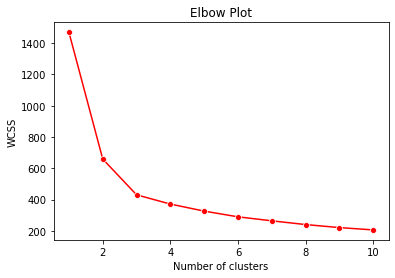

In [234]:
sns.lineplot(range(1,11), wss, marker='o',color='red')
plt.title('Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [236]:
k_means_3 = KMeans(n_clusters = 3)
k_means_3.fit(df_scaled)
labels_3 = k_means_3.labels_
labels_3

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

In [238]:
k_means_dataset=df.copy()
k_means_dataset['K_clusters']=labels_3
k_means_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K_clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0


In [239]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [240]:
silhouette_score(df_scaled,labels_3)

0.4008059221522216

In [243]:
sil_width = silhouette_samples(df_scaled,labels_3)

In [244]:
k_means_dataset['sil_width']=sil_width

In [246]:
k_means_dataset.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,K_clusters,sil_width
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0,0.573278
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2,0.365564
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0,0.637092
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1,0.515595
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0,0.360972


In [253]:
k_clusters=k_means_dataset.groupby('K_clusters').mean()
k_clusters.T

K_clusters,0,1,2
spending,18.495373,11.856944,14.437887
advance_payments,16.203433,13.247778,14.337746
probability_of_full_payment,0.884210,0.848330,0.881597
current_balance,6.175687,5.231750,5.514577
credit_limit,3.697537,2.849542,3.259225
min_payment_amt,3.632373,4.733892,2.707341
max_spent_in_single_shopping,6.041701,5.101722,5.120803
sil_width,0.468077,0.399556,0.338593


## 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters

In [251]:
k_clusters.T

K_clusters,0,1,2
spending,18.495373,11.856944,14.437887
advance_payments,16.203433,13.247778,14.337746
probability_of_full_payment,0.884210,0.848330,0.881597
current_balance,6.175687,5.231750,5.514577
credit_limit,3.697537,2.849542,3.259225
min_payment_amt,3.632373,4.733892,2.707341
max_spent_in_single_shopping,6.041701,5.101722,5.120803
sil_width,0.468077,0.399556,0.338593
Freq,67.000000,72.000000,71.000000


In [279]:
aggdata.T

clusters-3,1,2,3
spending,18.371429,11.872388,14.199041
advance_payments,16.145429,13.257015,14.233562
probability_of_full_payment,0.884400,0.848155,0.879190
current_balance,6.158171,5.238940,5.478233
credit_limit,3.684629,2.848537,3.226452
min_payment_amt,3.639157,4.940302,2.612181
max_spent_in_single_shopping,6.017371,5.122209,5.086178
Freq,70.000000,67.000000,73.000000
